In [20]:
import torch
from torch.nn import functional as F
import matplotlib.pyplot as plt
%matplotlib inline

## Softmax
The softmax function is a function that turns a vector of K real values into a vector of K real values that sum to 1
Hence it helps in converting some values into probabilities. Typically converting logits to probabilities

In [6]:
a = torch.randn(50)

In [9]:
print(a)
print(a.sum())

tensor([-1.2195,  1.2395, -0.3067, -0.8568,  0.2483,  0.6383, -0.2587, -0.1061,
         0.2129, -0.7006,  0.5722,  0.9278, -0.1104,  0.8546, -0.1761, -1.5549,
         0.4784,  0.5442, -1.9203,  0.1901,  0.4306, -0.0132,  2.1279,  0.1531,
         1.2064,  1.1593,  0.2041,  2.5901, -1.1990,  1.1224,  0.9788,  1.9934,
        -1.8697, -1.0991,  0.1994,  0.9286, -0.1066,  2.5766,  0.0829,  0.4909,
        -0.3450,  0.0809, -0.4384, -0.1148,  0.0051,  0.2600,  1.1114,  0.2598,
         1.0326,  1.8856])
tensor(14.3898)


In [12]:
# Manual Softmax
exp_a = a.exp()
soft = exp_a / exp_a.sum()

print("A: ", a)
print("Softmax: ", soft)
print("Softmax Sum: ", soft.sum())

A:  tensor([-1.2195,  1.2395, -0.3067, -0.8568,  0.2483,  0.6383, -0.2587, -0.1061,
         0.2129, -0.7006,  0.5722,  0.9278, -0.1104,  0.8546, -0.1761, -1.5549,
         0.4784,  0.5442, -1.9203,  0.1901,  0.4306, -0.0132,  2.1279,  0.1531,
         1.2064,  1.1593,  0.2041,  2.5901, -1.1990,  1.1224,  0.9788,  1.9934,
        -1.8697, -1.0991,  0.1994,  0.9286, -0.1066,  2.5766,  0.0829,  0.4909,
        -0.3450,  0.0809, -0.4384, -0.1148,  0.0051,  0.2600,  1.1114,  0.2598,
         1.0326,  1.8856])
Softmax:  tensor([0.0026, 0.0309, 0.0066, 0.0038, 0.0115, 0.0169, 0.0069, 0.0081, 0.0111,
        0.0044, 0.0159, 0.0226, 0.0080, 0.0210, 0.0075, 0.0019, 0.0144, 0.0154,
        0.0013, 0.0108, 0.0138, 0.0088, 0.0752, 0.0104, 0.0299, 0.0285, 0.0110,
        0.1193, 0.0027, 0.0275, 0.0238, 0.0657, 0.0014, 0.0030, 0.0109, 0.0227,
        0.0080, 0.1177, 0.0097, 0.0146, 0.0063, 0.0097, 0.0058, 0.0080, 0.0090,
        0.0116, 0.0272, 0.0116, 0.0251, 0.0590])
Softmax Sum:  tensor(1.0000)


In [17]:
# Torch Softmax
torch_soft = F.softmax(a, dim=0)

print("A: ", a)
print("Torch Softmax: ", torch_soft)
print("Torch Softmax Sum: ", torch_soft.sum())

A:  tensor([-1.2195,  1.2395, -0.3067, -0.8568,  0.2483,  0.6383, -0.2587, -0.1061,
         0.2129, -0.7006,  0.5722,  0.9278, -0.1104,  0.8546, -0.1761, -1.5549,
         0.4784,  0.5442, -1.9203,  0.1901,  0.4306, -0.0132,  2.1279,  0.1531,
         1.2064,  1.1593,  0.2041,  2.5901, -1.1990,  1.1224,  0.9788,  1.9934,
        -1.8697, -1.0991,  0.1994,  0.9286, -0.1066,  2.5766,  0.0829,  0.4909,
        -0.3450,  0.0809, -0.4384, -0.1148,  0.0051,  0.2600,  1.1114,  0.2598,
         1.0326,  1.8856])
Torch Softmax:  tensor([0.0026, 0.0309, 0.0066, 0.0038, 0.0115, 0.0169, 0.0069, 0.0081, 0.0111,
        0.0044, 0.0159, 0.0226, 0.0080, 0.0210, 0.0075, 0.0019, 0.0144, 0.0154,
        0.0013, 0.0108, 0.0138, 0.0088, 0.0752, 0.0104, 0.0299, 0.0285, 0.0110,
        0.1193, 0.0027, 0.0275, 0.0238, 0.0657, 0.0014, 0.0030, 0.0109, 0.0227,
        0.0080, 0.1177, 0.0097, 0.0146, 0.0063, 0.0097, 0.0058, 0.0080, 0.0090,
        0.0116, 0.0272, 0.0116, 0.0251, 0.0590])
Torch Softmax Sum:  tens

In [19]:
# Test
torch.allclose(soft, torch_soft)

True

## Large Values in Softmax Kill the Gradient
With large values in the input, Softmax makes most of the smaller values to be 0.
This will kill the gradient in the backwards pass

Consider
```
logits = layers(x)
y = F.softmax(logits)
loss = loss_fn(y)
```
then
```
dloss/dlogits = dloss/dy * dy/dlogits
dloss/dlogits = dloss/dy * derivative_of_softmax(w.r.t logits)

Derivative of softmax is 
if Si is the Softmax of the ith element in the vector and we are looking for its derivate w.r.t input element j
Derivate is `Si(1 - Sj) i == j else -SiSj`
```
Because the Gradient depends on the Softmax value, if the Softmax value is 0, it kills the gradient.
In below example, we can see that the Gradient is either 0 or 1 because of the extreme values in the Softmax

tensor([ -63.5903,   16.2025, -120.2178,  104.2291, -277.3809,  -64.7700,
        -261.1832,   71.8229,    9.0204,   40.9771,    3.1532,   -5.2061,
          56.8112,   47.7146,  -59.3553, -199.6092,   -8.9208,   64.5662,
          79.2030,  108.8731,  126.2075,   71.3321,  -21.7829,   67.5773,
          -9.7138,  117.2434,   65.9385,  -80.5493,  230.9534, -118.3978,
         151.8086,  -16.1134,  -70.7832,  -63.7035,  -65.5699,   64.5341,
          46.6259,  -59.8172,  -13.6545,   78.5851,  243.4778,  123.3118,
          13.9691,   80.5201,  -56.4978,  -28.0890,  133.6281, -119.1364,
          47.7933,  -94.8868])


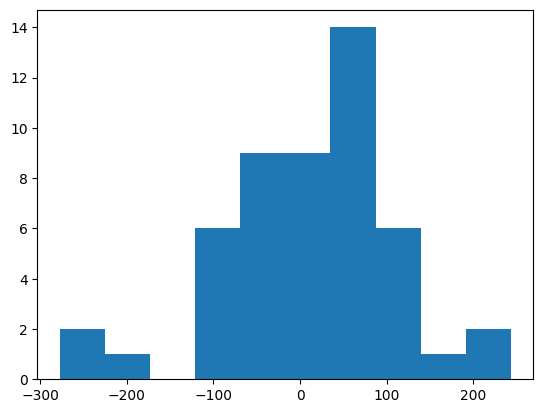

In [55]:
c = torch.randn(50) * 100
tc = F.softmax(c, dim=0)

print(c)
plt.hist(c);

tensor(1)

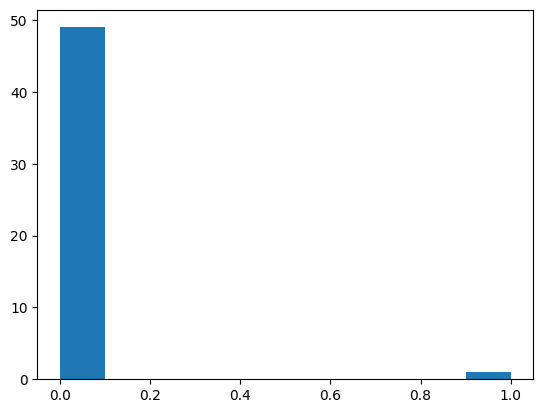

In [70]:
plt.hist(tc);

(tc > 0.01).sum()

## Normalize

Using Normalization we can prevent the gradient killing behavior of Softmax

In [102]:
norm_c = (c - c.mean()) / c.std()

tnc = F.softmax(norm_c, dim=0)
print(c)
print(norm_c)
print(tnc)
print(norm_c.mean(), norm_c.std())

tensor([ -63.5903,   16.2025, -120.2178,  104.2291, -277.3809,  -64.7700,
        -261.1832,   71.8229,    9.0204,   40.9771,    3.1532,   -5.2061,
          56.8112,   47.7146,  -59.3553, -199.6092,   -8.9208,   64.5662,
          79.2030,  108.8731,  126.2075,   71.3321,  -21.7829,   67.5773,
          -9.7138,  117.2434,   65.9385,  -80.5493,  230.9534, -118.3978,
         151.8086,  -16.1134,  -70.7832,  -63.7035,  -65.5699,   64.5341,
          46.6259,  -59.8172,  -13.6545,   78.5851,  243.4778,  123.3118,
          13.9691,   80.5201,  -56.4978,  -28.0890,  133.6281, -119.1364,
          47.7933,  -94.8868])
tensor([-0.6710,  0.0796, -1.2037,  0.9077, -2.6822, -0.6821, -2.5298,  0.6028,
         0.0120,  0.3126, -0.0432, -0.1218,  0.4616,  0.3760, -0.6312, -1.9506,
        -0.1568,  0.5345,  0.6722,  0.9513,  1.1144,  0.5982, -0.2778,  0.5629,
        -0.1642,  1.0301,  0.5475, -0.8306,  2.0998, -1.1866,  1.3552, -0.2244,
        -0.7387, -0.6721, -0.6897,  0.5342,  0.3658, -0.6

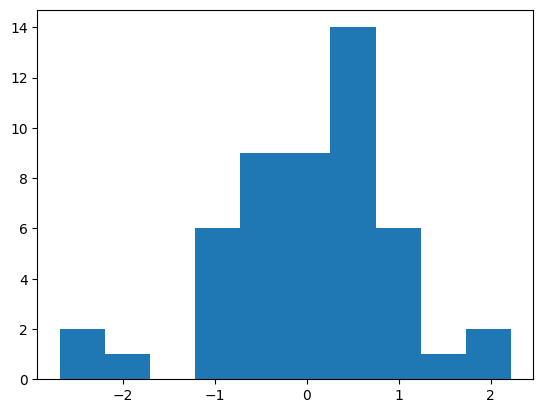

In [103]:
plt.hist(norm_c);

tensor(32)

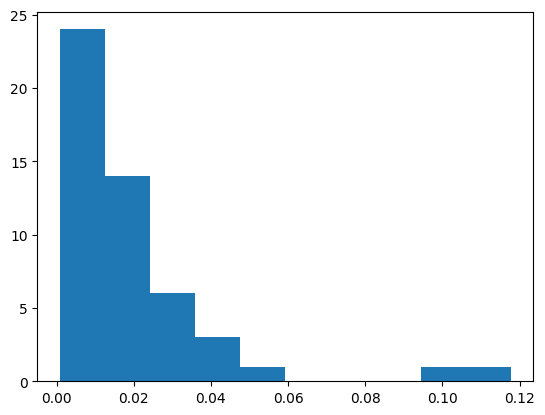

In [104]:
plt.hist(tnc);

(tnc > 0.01).sum()

## Fun Fact
Mathematically the probabilities remain same when we offset the input by a constant value in Softmax.

```
X = [a, b]
Softmax = [e^a / (e^a + e^b), e^b / (e^a + e^b)]
Y = [a - k, b - k]
Softmax = [e^a-k / (e^a-k + e^b-k), e^b-k / (e^a-k + e^b-k)]
```
The power `e^k` gets cancelled out and we get the same expression

In [108]:
X = torch.tensor([-5.1, 2.2, 4.4, 5])
Y = X.clone() + 30

probs1 = X.exp() / X.exp().sum()
probs2 = Y.exp() / Y.exp().sum()

probs1, probs2

(tensor([2.5521e-05, 3.7778e-02, 3.4095e-01, 6.2125e-01]),
 tensor([2.5521e-05, 3.7778e-02, 3.4095e-01, 6.2125e-01]))